In [131]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew

In [132]:
# Load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [133]:
print('Training dataset has {} rows and {} columns.'.format(train.shape[0], train.shape[1]))
print('Test dataset has {} rows and {} columns.'.format(test.shape[0], test.shape[1]))

Training dataset has 333 rows and 15 columns.
Test dataset has 173 rows and 14 columns.


In [134]:
train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [135]:
test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [137]:
train.describe(include='all')

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [138]:
test.describe(include='all')

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,258.404624,4.100862,12.661850,10.835145,0.086705,0.549981,6.321237,69.245665,3.958865,9.387283,406.231214,18.469942,351.299711,12.917977
std,143.289788,10.607761,24.536277,6.596488,0.282219,0.117826,0.700621,28.248244,2.324131,8.662621,164.480626,2.196196,99.781464,7.293408
min,3.000000,0.013810,0.000000,0.460000,0.000000,0.392000,4.138000,2.900000,1.178100,1.000000,187.000000,12.600000,0.320000,1.920000
25%,136.000000,0.082210,0.000000,5.320000,0.000000,0.447000,5.895000,42.800000,2.010700,4.000000,279.000000,17.000000,371.720000,6.870000
50%,268.000000,0.251990,0.000000,8.560000,0.000000,0.538000,6.223000,79.200000,3.421100,5.000000,330.000000,19.100000,390.070000,12.120000
75%,381.000000,3.673670,20.000000,18.100000,0.000000,0.624000,6.674000,94.600000,5.400700,24.000000,666.000000,20.200000,396.060000,17.210000
max,505.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000


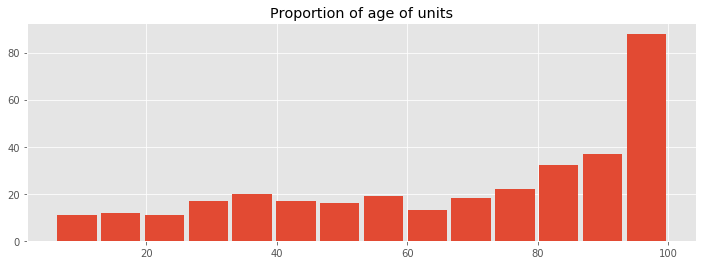

In [139]:
train.age.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('Proportion of age of units')
plt.show(block=False)

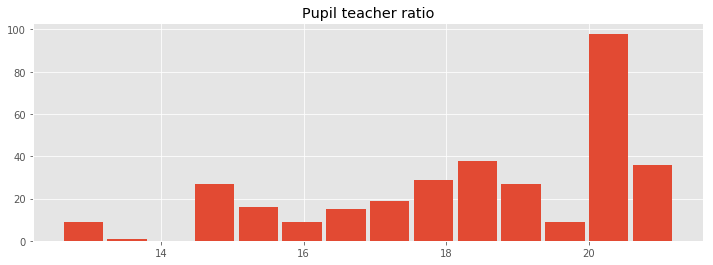

In [140]:
train.ptratio.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('Pupil teacher ratio')
plt.show(block=False)

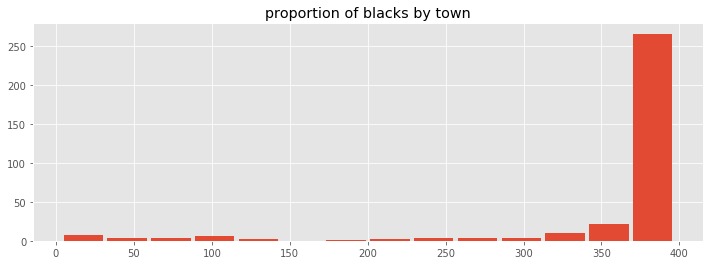

In [141]:
train.black.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('proportion of blacks by town')
plt.show(block=False)

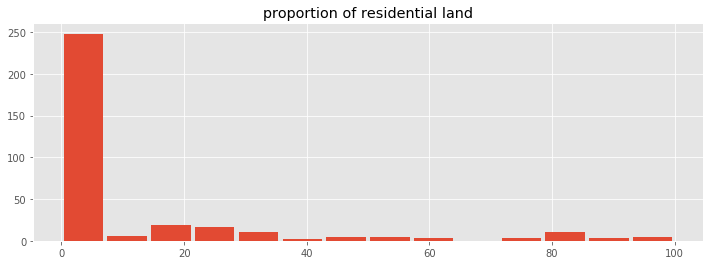

In [142]:
train.zn.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('proportion of residential land')
plt.show(block=False)

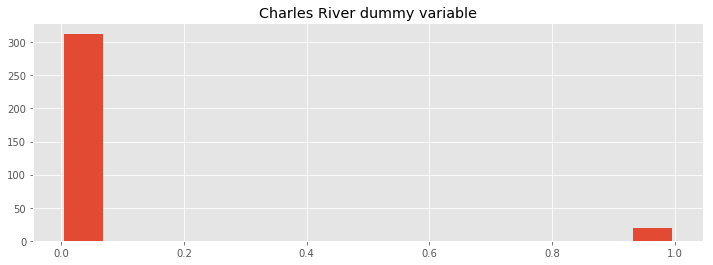

In [143]:
train.chas.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('Charles River dummy variable')
plt.show(block=False)

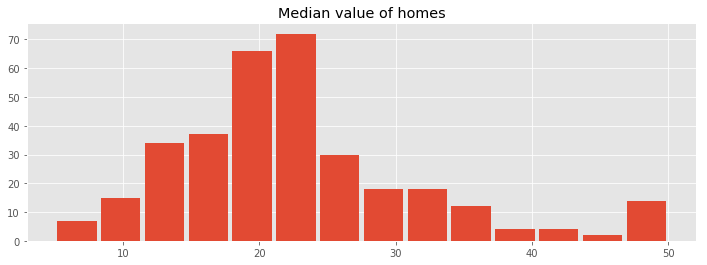

In [144]:
# Lets look at target variable
train.medv.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('Median value of homes')
plt.show(block=False)

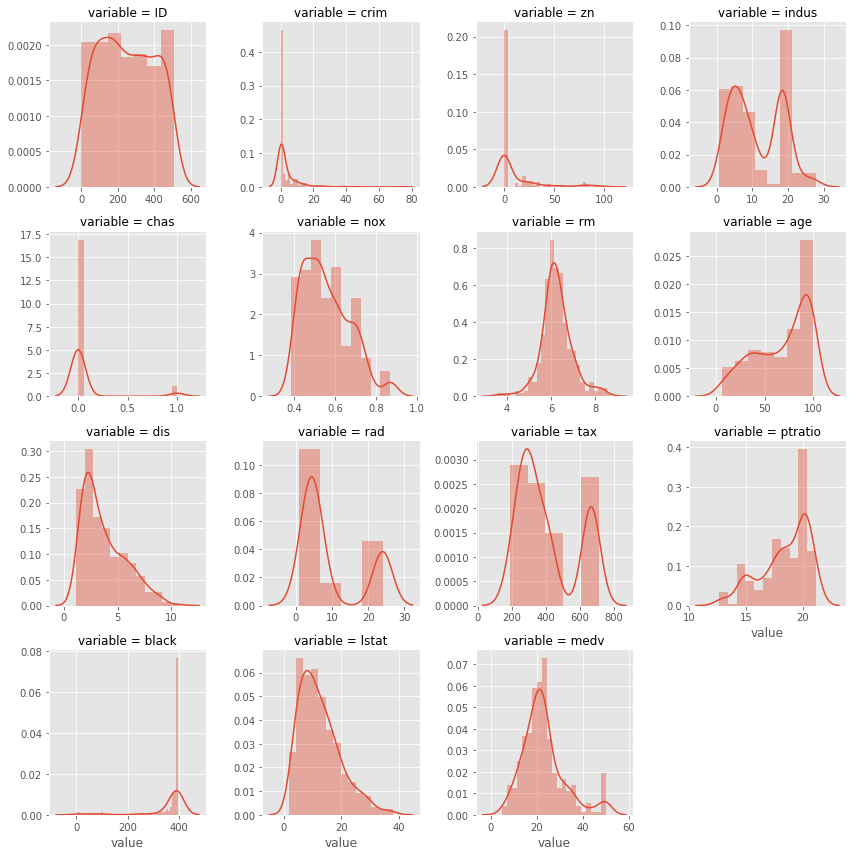

In [145]:
f = pd.melt(train)
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

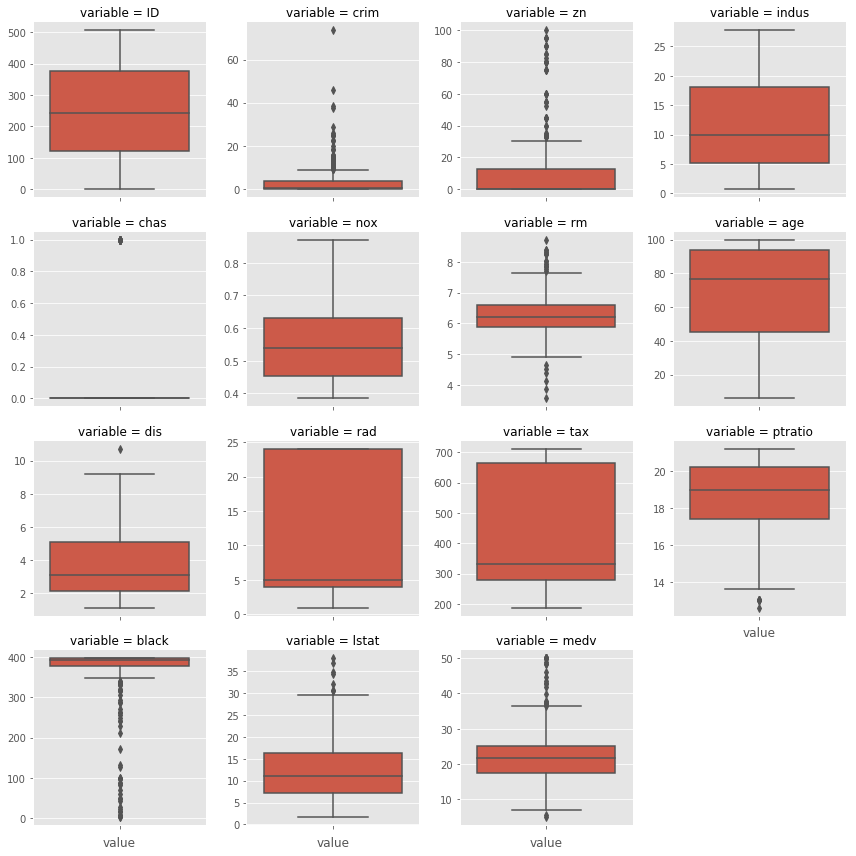

In [146]:
f = pd.melt(train)
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.boxplot,'value',orient='v')
g.set_xticklabels(rotation=90)

In [147]:
# Check for missing values
train.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [148]:
# Check for duplicate values
print('Train set duplicate IDs: {}'.format(train.duplicated('ID').sum()))
print('Test set duplicate IDs: {}'.format(test.duplicated('ID').sum()))

Train set duplicate IDs: 0
Test set duplicate IDs: 0


In [149]:
# Data cleaning
test_id=test['ID']
train = train.drop('ID', 1)
test = test.drop('ID', 1)

In [150]:
for cols in list(train):
    print('Column {} has Skew: {:.3f} | Kurtosis: {:.3f}'.format(cols,
        skew(train[cols]), kurtosis(train[cols])))

Column crim has Skew: 4.578 | Kurtosis: 30.444
Column zn has Skew: 2.363 | Kurtosis: 4.788
Column indus has Skew: 0.289 | Kurtosis: -1.240
Column chas has Skew: 3.703 | Kurtosis: 11.714
Column nox has Skew: 0.702 | Kurtosis: -0.120
Column rm has Skew: 0.283 | Kurtosis: 2.003
Column age has Skew: -0.602 | Kurtosis: -0.940
Column dis has Skew: 0.934 | Kurtosis: 0.094
Column rad has Skew: 0.979 | Kurtosis: -0.913
Column tax has Skew: 0.630 | Kurtosis: -1.191
Column ptratio has Skew: -0.786 | Kurtosis: -0.365
Column black has Skew: -2.985 | Kurtosis: 7.881
Column lstat has Skew: 0.974 | Kurtosis: 0.720
Column medv has Skew: 1.117 | Kurtosis: 1.517


In [151]:
max = train["black"].max()
train["black"]=train["black"]/max;
test["black"]=test["black"]/max;
col_length=len(train.columns)-1
col_list=list(train)[0:col_length]

for f in col_list:
    if(skew(train[f])>0.5):
        train.loc[:,f] = np.log1p(train[f])
        test.loc[:,f] = np.log1p(test[f])
        
#for f in col_list:
#    if(skew(train[f])<-0.5):
#        train.loc[:,f] = np.exp(train[f])
#        test.loc[:,f] = np.exp(test[f])

for cols in list(train):
    print('Column {} has Skew: {:.3f} | Kurtosis: {:.3f}'.format(cols,
        skew(train[cols]), kurtosis(train[cols])))

Column crim has Skew: 1.204 | Kurtosis: 0.271
Column zn has Skew: 1.249 | Kurtosis: -0.250
Column indus has Skew: 0.289 | Kurtosis: -1.240
Column chas has Skew: 3.703 | Kurtosis: 11.714
Column nox has Skew: 0.560 | Kurtosis: -0.416
Column rm has Skew: 0.283 | Kurtosis: 2.003
Column age has Skew: -0.602 | Kurtosis: -0.940
Column dis has Skew: 0.329 | Kurtosis: -0.924
Column rad has Skew: 0.501 | Kurtosis: -0.891
Column tax has Skew: 0.290 | Kurtosis: -1.210
Column ptratio has Skew: -0.786 | Kurtosis: -0.365
Column black has Skew: -2.985 | Kurtosis: 7.881
Column lstat has Skew: -0.172 | Kurtosis: -0.509
Column medv has Skew: 1.117 | Kurtosis: 1.517


In [152]:
y_train=train.iloc[:,-1]
x_train=train.iloc[:,0:col_length]
y_test=test.iloc[:,-1]
x_test=test.iloc[:,0:col_length]

In [153]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [154]:
def rsme(model, X, y):
    cv_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
    return np.sqrt(cv_scores)

In [155]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
Gboost = GradientBoostingRegressor()

In [156]:
param_grid={'n_estimators':[20,50,100,200], 
            'learning_rate': [0.1,0.05,0.02, 0.01], 
            'max_depth':[4,6,8], 
            'min_samples_leaf':[3,5,9,17], 
            'max_features':[1.0,0.3,0.1] } 

In [157]:
# We're using GridSearch here to find the optimal alpha value
# Get the ballpark
Gboost = GridSearchCV(Gboost, cv=10, param_grid=param_grid, scoring='neg_mean_squared_error')
Gboost.fit(x_train, y_train)
Gboost = Gboost.best_estimator_

In [158]:
print(Gboost)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=4, max_features=0.3,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=9,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


In [159]:
print('Gboost -> Train RSME: {:.5f} | Test RSME: {:.5f} '.format(
    rsme(Gboost, x_train, y_train).mean(), rsme(Gboost, x_test, y_test).mean()))

Gboost -> Train RSME: 4.09313 | Test RSME: 0.13439 


In [160]:
model_xgb = xgb.XGBRegressor()
param_grid={'n_estimators':[20,50,100,200], 
            'learning_rate': [0.1,0.05,0.02, 0.01], 
            'max_depth':[4,6,8],
            'reg_alpha':[0.25,0.5,0.75], 
            'reg_lambda':[0.25,0.5,0.75]} 
# We're using GridSearch here to find the optimal alpha value
# Get the ballpark
model_xgb = GridSearchCV(model_xgb, cv=10, param_grid=param_grid, scoring='neg_mean_squared_error')
model_xgb.fit(x_train, y_train)
model_xgb = model_xgb.best_estimator_
print('XGboost -> Train RSME: {:.5f} | Test RSME: {:.5f} '.format(
    rsme(model_xgb, x_train, y_train).mean(), rsme(model_xgb, x_test, y_test).mean()))

XGboost -> Train RSME: 4.18463 | Test RSME: 0.03323 


In [161]:
model_lgb = lgb.LGBMRegressor(objective='regression')
param_grid={'n_estimators':[20,50,100,200], 
            'learning_rate': [0.1,0.05,0.02, 0.01], 
            'num_leaves':[4,6,8],
            'bagging_fraction':[0.25,0.5,0.75], 
            'feature_fraction':[0.25,0.5,0.75]} 
# We're using GridSearch here to find the optimal alpha value
# Get the ballpark
model_lgb = GridSearchCV(model_lgb, cv=10, param_grid=param_grid, scoring='neg_mean_squared_error')
model_lgb.fit(x_train, y_train)
model_lgb = model_lgb.best_estimator_
print('XGboost -> Train RSME: {:.5f} | Test RSME: {:.5f} '.format(
    rsme(model_lgb, x_train, y_train).mean(), rsme(model_lgb, x_test, y_test).mean()))

XGboost -> Train RSME: 3.89329 | Test RSME: 0.08438 


In [166]:
ypred = model_xgb.predict(test)
d = {'ID': test_id,
     'medv': ypred}
df = pd.DataFrame(d)
df.to_csv('submission.csv', sep=',', index=False)